In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import curve_fit

In [2]:
vf = pd.read_excel(r'4. PASIVNI FILTRI.xlsx', sheet_name='VF')
vf

,ν / kHz,Ui / V,+/-,φ / °,Ui / Uu,+/-.1,φt / °
0,1,0.365,0.02,86.400,0.073,0.004,86.401232
1,4,1.400,0.05,83.000,0.280,0.010,75.879000
2,8,2.400,0.05,67.500,0.480,0.010,63.290990
3,10,2.700,0.05,57.485,0.540,0.010,57.832947
4,16,3.400,0.10,45.000,0.680,0.020,44.820390
5,20,3.800,0.10,35.380,0.760,0.020,38.484699
6,30,4.400,0.10,30.860,0.880,0.020,27.923590
7,40,4.500,0.10,27.690,0.900,0.020,21.677821
8,80,4.600,0.10,8.300,0.920,0.020,11.241051
9,100,4.600,0.10,3.270,0.920,0.020,9.034403


In [3]:
x = list(vf['ν / kHz'])
y = list(vf['Ui / Uu'])
greske = list(vf['+/-.1'])
y2 = list(vf['φ / °'])
y3 = list(vf['φt / °'])

ts = np.linspace(1, 100, 500)

In [4]:
def funkcija(x, v):
    return 1/np.sqrt(1 + (v / x)**2)

pars, cov = curve_fit(funkcija, x, y)
print(pars)

[15.97863304]


In [5]:
def funkcija2(x, v):
    return np.arctan(v/x) * 180/np.pi

pars2, cov2 = curve_fit(funkcija2, x, y2)
print(pars2)

[16.69224723]


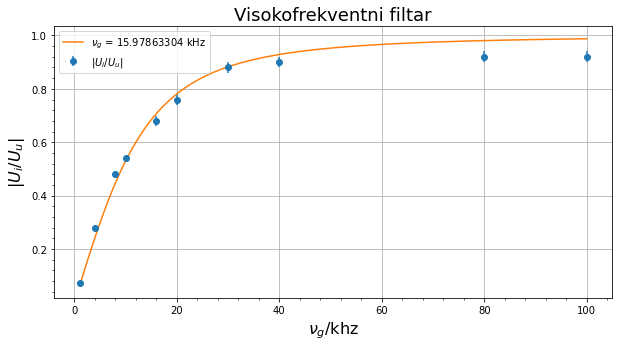

In [6]:
fig1, ax = plt.subplots(figsize=(10,5))
ax.set_title('Visokofrekventni filtar', fontsize = 18)
ax.set_xlabel(r'$ \nu_{g} \mathrm{/ khz} $', fontsize = 16)
ax.set_ylabel('$ |U_{i}/U_{u}| $', fontsize = 16)
ax.errorbar(x, y, yerr = greske, fmt='o', label = r'$ |U_{i}/U_{u}| $')
ax.plot(ts, funkcija(ts, *pars) , label = r'$ \nu_{g} $ = 15.97863304 kHz')
ax.legend()
ax.xaxis.set_minor_locator(MultipleLocator(4))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.grid()

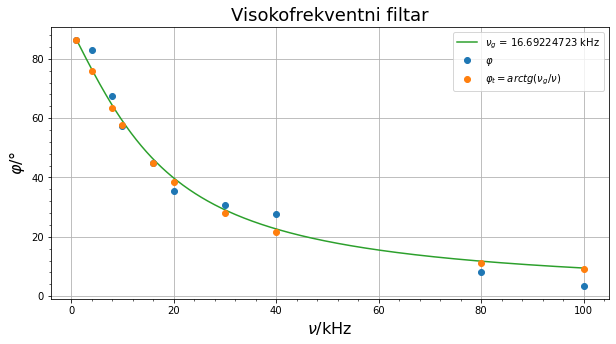

In [7]:
fig2, ex = plt.subplots(figsize=(10,5))
ex.set_title('Visokofrekventni filtar', fontsize = 18)
ex.set_xlabel(r'$ \nu \mathrm{/ kHz} $', fontsize = 16)
ex.set_ylabel(r'$ \varphi \mathrm{/ °} $', fontsize = 16)
ex.errorbar(x, y2, fmt='o', label = r'$ \varphi $')
ex.errorbar(x, y3, fmt='o', label = r'$ \varphi_{t} = arctg(\nu_{g}/\nu) $')
ex.plot(ts, funkcija2(ts, *pars2) , label = r'$ \nu_{g} $ = 16.69224723 kHz')
ex.legend()
ex.xaxis.set_minor_locator(MultipleLocator(4))
ex.yaxis.set_minor_locator(MultipleLocator(4))
ex.grid()

In [8]:
nf = pd.read_excel(r'4. PASIVNI FILTRI.xlsx', sheet_name='NF')
nf

,ν / kHz,Ui / V,+/-,φ / °,Ui / Uu,+/-.1,φt / °
0,1,4.9,0.10,-3.27,0.98,0.02,-3.598768
1,4,4.8,0.10,-18.30,0.96,0.02,-14.121000
2,8,4.4,0.10,-26.62,0.88,0.02,-26.709010
3,10,4.2,0.10,-28.24,0.84,0.02,-32.167053
4,16,3.6,0.10,-45.00,0.72,0.02,-45.179610
5,20,3.2,0.10,-49.85,0.64,0.02,-51.515301
6,30,2.5,0.10,-59.29,0.50,0.02,-62.076410
7,40,1.9,0.05,-69.23,0.38,0.01,-68.322179
8,80,1.1,0.05,-74.77,0.22,0.01,-78.758949
9,100,0.8,0.05,-83.08,0.16,0.01,-80.965597


In [9]:
x = list(nf['ν / kHz'])
y = list(nf['Ui / Uu'])
greske = list(nf['+/-.1'])
y2 = list(nf['φ / °'])
y3 = list(nf['φt / °'])

In [10]:
def funkcija3(x, v):
    return 1/np.sqrt(1 + (x / v)**2)

pars3, cov3 = curve_fit(funkcija3, x, y)
print(pars3)

[16.59840846]


In [11]:
def funkcija4(x, v):
    return np.arctan(-x/v) * 180/np.pi

pars4, cov4 = curve_fit(funkcija4, x, y2)
print(pars4)

[16.58535411]


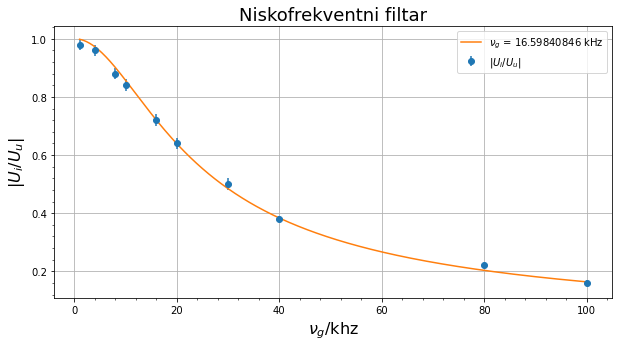

In [12]:
fig3, ix = plt.subplots(figsize=(10,5))
ix.set_title('Niskofrekventni filtar', fontsize = 18)
ix.set_xlabel(r'$ \nu_{g} \mathrm{/ khz} $', fontsize = 16)
ix.set_ylabel('$ |U_{i}/U_{u}| $', fontsize = 16)
ix.errorbar(x, y, yerr = greske, fmt='o', label = r'$ |U_{i}/U_{u}| $')
ix.plot(ts, funkcija3(ts, *pars3) , label = r'$ \nu_{g} $ = 16.59840846 kHz')
ix.legend()
ix.xaxis.set_minor_locator(MultipleLocator(4))
ix.yaxis.set_minor_locator(MultipleLocator(0.04))
ix.grid()

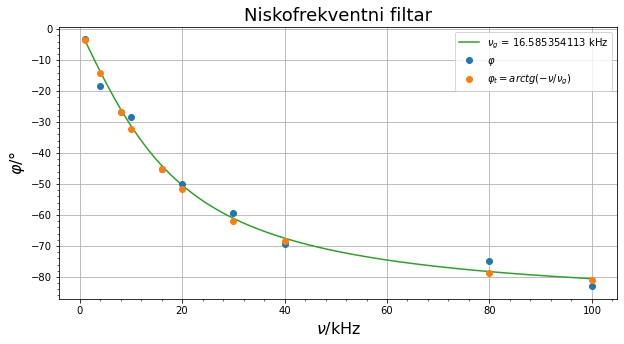

In [13]:
fig4, ux = plt.subplots(figsize=(10,5))
ux.set_title('Niskofrekventni filtar', fontsize = 18)
ux.set_xlabel(r'$ \nu \mathrm{/ kHz} $', fontsize = 16)
ux.set_ylabel(r'$ \varphi \mathrm{/ °} $', fontsize = 16)
ux.errorbar(x, y2, fmt='o', label = r'$ \varphi $')
ux.errorbar(x, y3, fmt='o', label = r'$ \varphi_{t} = arctg(-\nu/\nu_{g}) $')
ux.plot(ts, funkcija4(ts, *pars4) , label = r'$ \nu_{g} $ = 16.585354113 kHz')
ux.legend()
ux.xaxis.set_minor_locator(MultipleLocator(4))
ux.yaxis.set_minor_locator(MultipleLocator(2))
ux.grid()

In [14]:
up = pd.read_excel(r'4. PASIVNI FILTRI.xlsx', sheet_name='UP')
up

,ν / kHz,Ui / V,+/-,φ / °,+/-.1,Ui / Uu,+/-.2,φt / °
0,1,0.31,0.01,78.92,3.00,0.062,0.002,79.273638
1,4,0.90,0.05,55.00,3.00,0.180,0.010,51.141287
2,8,1.40,0.05,27.69,1.50,0.280,0.010,26.325520
3,10,1.50,0.05,17.14,1.50,0.300,0.010,17.763193
4,16,1.55,0.05,6.75,0.25,0.310,0.010,-0.239482
5,20,1.60,0.05,2.77,0.25,0.320,0.010,-8.770847
6,30,1.50,0.05,-17.88,1.50,0.300,0.010,-24.335534
7,40,1.35,0.05,-27.69,1.50,0.270,0.010,-35.224937
8,80,0.80,0.05,-49.85,3.00,0.160,0.010,-58.169171
9,100,0.60,0.05,-55.38,3.00,0.120,0.010,-63.924177


In [15]:
x = list(up['ν / kHz'])
y = list(up['Ui / Uu'])
greske1 = list(up['+/-.2'])
y2 = list(up['φ / °'])
y3 = list(up['φt / °'])
greske2 = list(vf['+/-.1'])

In [16]:
def funkcija5(x, v):
    return 1/np.sqrt(((v/x) - (x/v))**2 + 9)

pars5, cov5 = curve_fit(funkcija5, x, y)
print(pars5)

[16.04068275]


In [17]:
def funkcija6(x, v):
    return np.arctan((v/(3*x)) - (x/(3*v))) * 180/np.pi

pars6, cov6 = curve_fit(funkcija6, x, y2)
print(pars6)

[18.75772881]


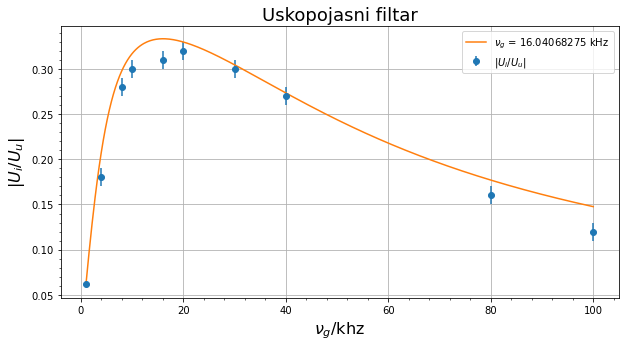

In [18]:
fig5, tx = plt.subplots(figsize=(10,5))
tx.set_title('Uskopojasni filtar', fontsize = 18)
tx.set_xlabel(r'$ \nu_{g} \mathrm{/ khz} $', fontsize = 16)
tx.set_ylabel('$ |U_{i}/U_{u}| $', fontsize = 16)
tx.errorbar(x, y, yerr = greske1, fmt='o', label = r'$ |U_{i}/U_{u}| $')
tx.plot(ts, funkcija5(ts, *pars5) , label = r'$ \nu_{g} $ = 16.04068275 kHz')
tx.legend()
tx.xaxis.set_minor_locator(MultipleLocator(4))
tx.yaxis.set_minor_locator(MultipleLocator(0.01))
tx.grid()

In [19]:
from scipy.optimize import minimize

def za_max(x):
    return -funkcija5(x, *pars5)

print('Max:', minimize(za_max, 16.04, method='Nelder-Mead', tol=1e-4, options={'xtol': 1e-8, 'disp': True}))

Optimization terminated successfully.
         Current function value: -0.333333
         Iterations: 28
         Function evaluations: 61
Max:  final_simplex: (array([[16.04068263],
       [16.04068263]]), array([-0.33333333, -0.33333333]))
           fun: -0.3333333333333333
       message: 'Optimization terminated successfully.'
          nfev: 61
           nit: 28
        status: 0
       success: True
             x: array([16.04068263])


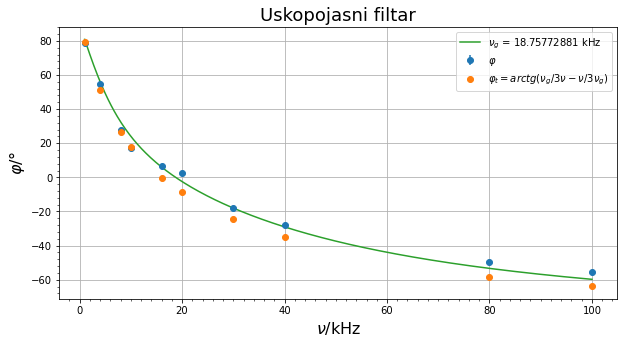

In [20]:
fig6, kx = plt.subplots(figsize=(10,5))
kx.set_title('Uskopojasni filtar', fontsize = 18)
kx.set_xlabel(r'$ \nu \mathrm{/ kHz} $', fontsize = 16)
kx.set_ylabel(r'$ \varphi \mathrm{/ °} $', fontsize = 16)
kx.errorbar(x, y2, yerr = greske2, fmt='o', label = r'$ \varphi $')
kx.errorbar(x, y3, fmt='o', label = r'$ \varphi_{t} = arctg(\nu_{g}/3\nu - \nu/3\nu_{g}) $')
kx.plot(ts, funkcija6(ts, *pars6) , label = r'$ \nu_{g} $ = 18.75772881 kHz')
kx.legend()
kx.xaxis.set_minor_locator(MultipleLocator(2))
kx.yaxis.set_minor_locator(MultipleLocator(4))
kx.grid()

In [21]:
sp = pd.read_excel(r'4. PASIVNI FILTRI.xlsx', sheet_name='SP')
sp

,ν / kHz,Ui / V,+/-,φ / °,+/-.1,Ui / Uu,+/-.2,φt / °
0,1,0.60,0.01,81.88,3.00,0.12,0.002,70.875499
1,4,1.70,0.05,55.25,3.00,0.34,0.010,34.410041
2,8,2.20,0.05,27.69,1.50,0.44,0.010,15.902524
3,10,2.35,0.05,17.14,1.50,0.47,0.010,10.944523
4,16,2.45,0.05,2.25,0.25,0.49,0.010,1.563276
5,20,2.40,0.05,0.10,0.05,0.48,0.010,-2.706015
6,32,2.30,0.05,-18.00,1.50,0.46,0.010,-12.225711
7,40,2.20,0.05,-27.69,1.50,0.44,0.010,-17.303676
8,80,1.65,0.05,-49.85,3.00,0.33,0.010,-36.188278
9,100,1.45,0.05,-52.62,3.00,0.29,0.010,-42.945694


In [22]:
x = list(sp['ν / kHz'])
y = list(sp['Ui / Uu'])
greske1 = list(sp['+/-.2'])
y2 = list(sp['φ / °'])
y3 = list(sp['φt / °'])
greske2 = list(vf['+/-.1'])

In [37]:
def funkcija7(x, v, a):
    return a/np.sqrt(((v/x) - (x/v))**2 + 9)

def funkc(x, v1, v2, a):
    return a/np.sqrt( ((v1*a/x) + (x*a/v2))**2 + 9)


pars7, cov7 = curve_fit(funkcija7, x, y)
par2, co2 = curve_fit(funkcija5, x, y)
par, co = curve_fit(funkc, x, y)
print(pars7)
print(par2)
print(par)

[18.03599568  1.53815564]
[18.87608971]
[ 8.68030661 34.73383754  1.65744112]


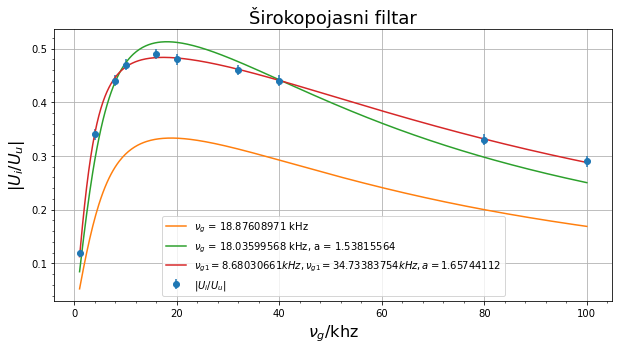

In [38]:
fig7, gx = plt.subplots(figsize=(10,5))
gx.set_title('Širokopojasni filtar', fontsize = 18)
gx.set_xlabel(r'$ \nu_{g} \mathrm{/ khz} $', fontsize = 16)
gx.set_ylabel('$ |U_{i}/U_{u}| $', fontsize = 16)
gx.errorbar(x, y, yerr = greske1, fmt='o', label = r'$ |U_{i}/U_{u}| $')
gx.plot(ts, funkcija5(ts, par2) , label = r'$ \nu_{g} $ = 18.87608971 kHz')
gx.plot(ts, funkcija7(ts, *pars7) , label = r'$ \nu_{g} $ = 18.03599568 kHz, a = 1.53815564')
gx.plot(ts, funkc(ts, *par) , label = r'$ \nu_{g1} = 8.68030661 kHz, \nu_{g1} = 34.73383754 kHz, a = 1.65744112 $')
gx.legend()
gx.xaxis.set_minor_locator(MultipleLocator(4))
gx.yaxis.set_minor_locator(MultipleLocator(0.02))
gx.grid()

In [39]:
from scipy.optimize import minimize

def za_Max(x):
    return -funkc(x, *par)

print('Max:', minimize(za_Max, 16.04, method='Nelder-Mead', tol=1e-4, options={'xtol': 1e-8, 'disp': True}))

Optimization terminated successfully.
         Current function value: -0.483605
         Iterations: 29
         Function evaluations: 63
Max:  final_simplex: (array([[17.36376587],
       [17.36376586]]), array([-0.48360525, -0.48360525]))
           fun: -0.48360525415789474
       message: 'Optimization terminated successfully.'
          nfev: 63
           nit: 29
        status: 0
       success: True
             x: array([17.36376587])


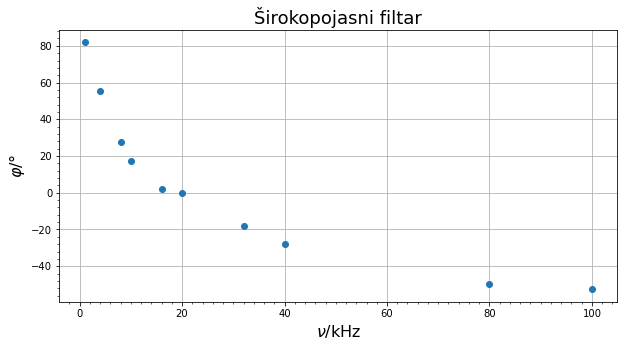

In [29]:
fig8, qx = plt.subplots(figsize=(10,5))
qx.set_title('Širokopojasni filtar', fontsize = 18)
qx.set_xlabel(r'$ \nu \mathrm{/ kHz} $', fontsize = 16)
qx.set_ylabel(r'$ \varphi \mathrm{/ °} $', fontsize = 16)
qx.errorbar(x, y2, fmt='o', yerr = greske2, label = r'$ \varphi $')
qx.xaxis.set_minor_locator(MultipleLocator(2))
qx.yaxis.set_minor_locator(MultipleLocator(4))
qx.grid()

In [34]:
fig1.savefig('vf_napon.png')
fig2.savefig('vf_pomak.png')
fig3.savefig('nf_napon.png')
fig4.savefig('nf_pomak.png')
fig5.savefig('uf_napon.png')
fig6.savefig('uf_pomak.png')
fig7.savefig('sf_napon.png')
fig8.savefig('sf_pomak.png')